***

**<center><font size = "6">Explore Data Analysis<center>**
***
<center><font size = "2">Prepared by: Sitsawek Sukorn<center>

## Elements of Structured Data
### Key Terms for Data Type

**Continuous**
+ Data can take on any value in interval.
+ Synonyms: interval, float, numeric

**Discrete**
+ Data that can only take on integer values, such as counts.
+ Synonyms: integer, count

**Categorical**
+ Data that can only take on a specific set of values.
+ Synonyms: enums, enumerated, factors, nominal, polychotomous

**Binary**
+ A special case of categorical with just two categories (0/1, True, False).
+ Synonyms: dichotomous, logical, indicator

**Ordinal**
+ Categorical data that has an explicit ordering.
+ Synonyms: ordered factor

***

## Rectangular Data

### Key Terms for Rectangular Data

**Data frame**
+ Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning models

**Feature**
+ A column in the table is commonly to as a feature.
+ Synonyms: attribute, input, predictor, variable

**Outcome**
+ Many data science projects involve predicting an outcome - often a yes/no outcome. The features are sometimes used to predict the outcoume in an experiment or study.
+ Synonyms: dependent variable, response, target, output

**Records**
+ A row in the table is commonly referred to as a record.
+ Synonyms: case, example, instance, observation, pattern, sample

In [2]:
import numpy as np
import pandas as pd

In [7]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [8]:
pd.Series(np.random.randn(5))

0   -0.648065
1    0.910601
2   -1.508631
3   -1.418051
4    0.652376
dtype: float64

In [9]:
d = {"b":1, "a":0,"c":2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [10]:
# If an index is passed, the values will be pulled out.
d = {"a":0.0, "b":1.0, "c":2.0}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [11]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [12]:
# From scalar value
pd.Series(5.0, index=['a','b','c','d','e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [13]:
# Series is ndarray-like
s[0]

0.5394603798345127

In [15]:
s[:3]

a    0.539460
b   -0.862998
c    1.599834
dtype: float64

In [19]:
s[s > s.median()]

a    0.539460
c    1.599834
dtype: float64

In [21]:
s[[4,3,1]]

e    0.059672
d    0.521283
b   -0.862998
dtype: float64

In [22]:
np.exp(s)

a    1.715081
b    0.421895
c    4.952209
d    1.684187
e    1.061488
dtype: float64

In [23]:
s.dtype

dtype('float64')

In [24]:
s.array

<PandasArray>
[ 0.5394603798345127, -0.8629977400398543,  1.5998337621824772,
  0.5212831240054855,  0.0596721404784204]
Length: 5, dtype: float64

In [25]:
# If you need an actual ndarray
s.to_numpy()

array([ 0.53946038, -0.86299774,  1.59983376,  0.52128312,  0.05967214])

In [26]:
# Series is dict-like
s["a"]

0.5394603798345127

In [28]:
s["e"] = 12.0
s

a     0.539460
b    -0.862998
c     1.599834
d     0.521283
e    12.000000
dtype: float64

In [29]:
"e" in s

True

In [30]:
"f" in s

False

In [34]:
# Using the Series.get() will return none or specified default.
s.get("f", np.nan)

nan

In [35]:
# Vectorized operations and label alignment with Series
# Looping through value-by-value is usually not necessary.
s + s

a     1.078921
b    -1.725995
c     3.199668
d     1.042566
e    24.000000
dtype: float64

In [38]:
s * 2

a     1.078921
b    -1.725995
c     3.199668
d     1.042566
e    24.000000
dtype: float64

In [39]:
np.exp(s)

a         1.715081
b         0.421895
c         4.952209
d         1.684187
e    162754.791419
dtype: float64

In [40]:
# Name attribute
s = pd.Series(np.random.randn(5), name="something")
s

0   -0.780635
1    0.936785
2    0.120344
3    0.368465
4    1.180121
Name: something, dtype: float64

In [41]:
s.name

'something'

In [42]:
# Rename a Series
s2 = s.rename("different")
s2.name

'different'

### Data Frame

In [45]:
# From dict of Series or dicts
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [55]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [56]:
pd.DataFrame(d, index=['d','b','a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [57]:
# From dict of ndarrays / lists
d = {'one': [1.0, 2.0, 2.0, 4.0], 'two':[4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,2.0,2.0
3,4.0,1.0


In [58]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,2.0,2.0
d,4.0,1.0


In [59]:
# From structured or record array
data = np.zeros((2,), dtype=[('a', 'i4'), ('b', 'f4'), ('c', 'a10')])
data[:] = [(1, 2.0, 'Hello'), (2, 3.0, 'World')]
pd.DataFrame(data)

,a,b,c
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [60]:
pd.DataFrame(data, index=['first', 'second'])

,a,b,c
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [61]:
pd.DataFrame(data, columns=['c', 'a', 'b'])

,c,a,b
0,b'Hello',1,2.0
1,b'World',2,3.0


In [63]:
# From a list of dicts
data2 = [{'a':1, 'b':2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [64]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [66]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


In [68]:
# From a dict of tuples
pd.DataFrame(
    {
        ('a','b'):{('A','B'):1, ('A','C'):2},
        ('a','a'):{('A','C'): 3, ('A','B'): 4},
        ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
        ('b', 'a'):{('A', 'C'): 7, ('A','B'): 8},
        ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [69]:
# From a Series
ser = pd.Series(range(3), index=list('abc'), name='ser')
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


In [70]:
# From a list of namedtuples
from collections import namedtuple
Point = namedtuple('Point', 'x y')
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [71]:
Point3D = namedtuple('Point3D', 'x y z')
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [72]:
# From a list of dataclasses
from dataclasses import make_dataclass
Point = make_dataclass('Point', [('x', int), ('y', int)])
pd.DataFrame([Point(0,0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


### Alternate constructors

In [73]:
# DataFrame.from_dict
pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [74]:
# If pass orient='index' the keys will be the row lables.
pd.DataFrame.from_dict(
    dict([('A', [1,2,3]), ('B', [4,5,6])]),
    orient='index',
    columns=['one', 'two', 'three'],
)

,one,two,three
A,1,2,3
B,4,5,6


In [75]:
# DataFrame.from_records()
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('a', '<i4'), ('b', '<f4'), ('c', 'S10')])

In [77]:
pd.DataFrame.from_records(data, index='c')

,a,b
c,,
b'Hello',1,2.0
b'World',2,3.0


### Column selection, addition, deletion

In [85]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [86]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [94]:
# Columns can be deleted or popped like with a dict:
del df['two']
three = df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [95]:
# When inserting a scalar value, it will naturally be propagated to fill the column:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [96]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [97]:
# Inserts at a particular location in the columns
df.insert(1, 'bar', df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


### Assigning new columns in method chains

In [103]:
import requests
import io
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
s = requests.get(url).content
iris = pd.read_csv(io.StringIO(s.decode('utf-8')))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
iris.assign(sepal_ratio=iris['sepal_width'] / iris['sepal_length']).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [106]:
# Can also pass in a function
iris.assign(sepal_ratio=lambda x: (x['sepal_width'] / x['sepal_length'])).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='sepal_ratio', ylabel='petal_ratio'>

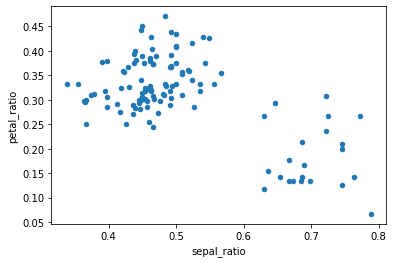

In [112]:
import matplotlib.pyplot as plt
(
    iris.query('sepal_length > 5')
    .assign(
        sepal_ratio=lambda x: x.sepal_width / x.sepal_length,
        petal_ratio=lambda x: x.petal_width / x.petal_length,
        )
        .plot(kind='scatter', x='sepal_ratio', y='petal_ratio')
)

In [113]:
dfa = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})
dfa.assign(c=lambda x: x['a'] + x['b'], d=lambda x: x['a'] + x['c'])

,a,b,c,d
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


### Indexing / selection
**Select column**
+ df[col]
+ Series

**Select row by label**
+ df.loc[lable]
+ Series

**Select row by integer location**
+ df.iloc[loc]
+ Series

**Slice rows**
+ df[5:10]
+ DataFrame

**Select rows by boolean vector**
+ df[bool_vec]
+ DataFrame

In [120]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [121]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

### Data alignment and arithmetic

In [122]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(7,3), columns=['a', 'b', 'c'])
df + df2

,a,b,c,d
0,-1.302319,-2.427139,1.711501,NaN
1,-0.640094,0.790718,-0.635940,NaN
2,-1.987142,-0.300999,-1.031257,NaN
3,0.171895,-0.454937,-0.719453,NaN
4,-0.050667,-0.667643,-0.976513,NaN
5,-0.283628,-0.737913,0.535200,NaN
6,-0.285212,1.223295,0.644332,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


***

## Estimates of Location
### Key Terms for Estimates of Location
**Mean

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')